In [2]:
import rdkit.Chem
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
import itertools
import scipy.stats
from scipy.spatial import distance
import collections

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import rdkit.Chem
import csv
from tqdm import tqdm

In [50]:
#ring_smiles = np.loadtxt('./RingSmiles.csv', delimiter=',', dtype = 'str')
ring_smiles = pd.read_csv('./RingSmiles.csv')
ring_smiles = ring_smiles['0']

In [105]:
ring_smiles = ring_smiles.drop_duplicates()

In [106]:
ring_smiles

0      Cc1ccc2c(c1)cc(C(=O)N1CC[C@H](C(=O)N3CCCCC3)C1...
1                    O[C@@H]1C=C[C@H](O)[C@H](O)[C@@H]1O
2                                    C1CC1N[C@@H]1CCCSC1
3                                  CC1(C)CC[C@H](C#N)N1O
4                                      O=C1CCC[C@H](O)N1
                             ...                        
995                                         Cc1csc(CO)c1
996                                     Nc1nccn[n+]1[O-]
997                                   C[C@H]1SC(=N)NC1=O
998                                         CCn1cccc1C#N
999                          O=C1N[C@H](C(=O)O)C[C@@H]1O
Name: 0, Length: 985, dtype: object

In [107]:
mol_names = list(set(ring_smiles))
mols = [Chem.MolFromSmiles(x) for x in mol_names]
#mols = [Chem.rdmolops.AddHs(Chem.MolFromSmiles(x)) for x in mol_names]

fps = [FingerprintMols.FingerprintMol(x,  minPath=1, maxPath=7, fpSize=2048,
                               bitsPerHash=2, useHs=True, tgtDensity=0.0,
                               minSize=128) for x in mols]
tanimoto_matrix = pd.DataFrame()
for n in tqdm(range(len(fps))):
    s = DataStructs.BulkTanimotoSimilarity(fps[n], fps)
    tanimoto_matrix[mol_names[n]] = s
    
tanimoto_noindex = tanimoto_matrix

tanimoto_matrix

  0%|                                                   | 0/985 [00:00<?, ?it/s]/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

 40%|███████████████▉                        | 392/985 [00:00<00:01, 387.92it/s]/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

 56%|██████████████████████▏                 | 547/985 [00:01<00:01, 345.74it/s]/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

 63%|█████████████████████████               | 618/985 [00:01<00:01, 346.88it/s]/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
 70%|███████████████████████████▉            | 688/985 [00:01<00:00, 344.50it/s]/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
 77%|██████████████████████████████▊         | 758/985 [00:01<00:00, 339.69it/s]/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/var/folders/qc/kdqppv890tsc3zsxkk7rypjm0000gs/T/ipykernel_60668/39297148.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

,CCCCCC[C@H]1C(=O)O[C@H](C)C(=O)C(=O)O[C@@H](C)[C@@H]1OC(=O)CC(C)C,CSc1ccccc1CO,CONC(=O)c1cnns1,CS(=O)(=O)c1ccncc1,CCc1ncc(C)c(Cl)n1,C[C@H]1CCNCC[S@@]1=O,CCOCC=C1CCC1,C1=C[C@@H]2CCC3CC[C@@H]1N32,N=c1cnc(CO)cn1O,CN(C)c1nccc(N)n1,...,Cc1cc(C#N)n(C)c1C,COc1ccc(Cl)nc1N,COC1=CCC[C@@H]1OC,CN(C)c1cc(=O)cc[nH]1,CNC(=O)C1=CCCCC1,C1CC23CCCC2(C1)CC3,C[C@@H]1C[C@@H](F)CN1CCN,CC[C@@H]1CCC[C@@H]1O,C=CCSC[C@H]1CC1(Cl)Cl,BrC1=NO[C@H]2CNC[C@@H]12
0,1.000000,0.069164,0.085676,0.068759,0.085048,0.085714,0.049834,0.103401,0.097497,0.080645,...,0.099751,0.113695,0.169304,0.065278,0.104046,0.081940,0.074713,0.120567,0.075269,0.148551
1,0.069164,1.000000,0.078240,0.127451,0.079487,0.053892,0.048000,0.057554,0.089412,0.085799,...,0.084746,0.090909,0.045326,0.078804,0.056300,0.025926,0.070822,0.027451,0.041009,0.077922
2,0.085676,0.078240,1.000000,0.061538,0.074561,0.055138,0.040881,0.078224,0.115304,0.081886,...,0.088015,0.095703,0.060533,0.063927,0.061927,0.005814,0.051765,0.027950,0.052770,0.085142
3,0.068759,0.127451,0.061538,1.000000,0.109859,0.051780,0.030702,0.050761,0.076543,0.103896,...,0.089888,0.120482,0.033233,0.128049,0.045584,0.024590,0.054054,0.012931,0.070671,0.065385
4,0.085048,0.079487,0.074561,0.109859,1.000000,0.044271,0.029801,0.076923,0.122807,0.162011,...,0.128773,0.131799,0.055556,0.103960,0.070048,0.048232,0.059553,0.033223,0.035519,0.075085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,0.081940,0.025926,0.005814,0.024590,0.048232,0.048980,0.077419,0.061350,0.033708,0.038168,...,0.039900,0.036554,0.057915,0.027211,0.064057,1.000000,0.048148,0.237037,0.063348,0.042918
981,0.074713,0.070822,0.051765,0.054054,0.059553,0.115265,0.055118,0.288184,0.085648,0.068768,...,0.068041,0.068670,0.065341,0.066138,0.117318,0.048148,1.000000,0.038760,0.053292,0.105461
982,0.120567,0.027451,0.027950,0.012931,0.033223,0.047619,0.093525,0.050794,0.047478,0.023904,...,0.020305,0.021390,0.121212,0.014134,0.055762,0.237037,0.038760,1.000000,0.067961,0.063205
983,0.075269,0.041009,0.052770,0.070671,0.035519,0.135531,0.067961,0.069705,0.036946,0.041667,...,0.037528,0.048951,0.075658,0.050296,0.063444,0.063348,0.053292,0.067961,1.000000,0.063116


In [108]:
dissim_matrix = 1 - tanimoto_matrix
dissim_matrix

,CCCCCC[C@H]1C(=O)O[C@H](C)C(=O)C(=O)O[C@@H](C)[C@@H]1OC(=O)CC(C)C,CSc1ccccc1CO,CONC(=O)c1cnns1,CS(=O)(=O)c1ccncc1,CCc1ncc(C)c(Cl)n1,C[C@H]1CCNCC[S@@]1=O,CCOCC=C1CCC1,C1=C[C@@H]2CCC3CC[C@@H]1N32,N=c1cnc(CO)cn1O,CN(C)c1nccc(N)n1,...,Cc1cc(C#N)n(C)c1C,COc1ccc(Cl)nc1N,COC1=CCC[C@@H]1OC,CN(C)c1cc(=O)cc[nH]1,CNC(=O)C1=CCCCC1,C1CC23CCCC2(C1)CC3,C[C@@H]1C[C@@H](F)CN1CCN,CC[C@@H]1CCC[C@@H]1O,C=CCSC[C@H]1CC1(Cl)Cl,BrC1=NO[C@H]2CNC[C@@H]12
0,0.000000,0.930836,0.914324,0.931241,0.914952,0.914286,0.950166,0.896599,0.902503,0.919355,...,0.900249,0.886305,0.830696,0.934722,0.895954,0.918060,0.925287,0.879433,0.924731,0.851449
1,0.930836,0.000000,0.921760,0.872549,0.920513,0.946108,0.952000,0.942446,0.910588,0.914201,...,0.915254,0.909091,0.954674,0.921196,0.943700,0.974074,0.929178,0.972549,0.958991,0.922078
2,0.914324,0.921760,0.000000,0.938462,0.925439,0.944862,0.959119,0.921776,0.884696,0.918114,...,0.911985,0.904297,0.939467,0.936073,0.938073,0.994186,0.948235,0.972050,0.947230,0.914858
3,0.931241,0.872549,0.938462,0.000000,0.890141,0.948220,0.969298,0.949239,0.923457,0.896104,...,0.910112,0.879518,0.966767,0.871951,0.954416,0.975410,0.945946,0.987069,0.929329,0.934615
4,0.914952,0.920513,0.925439,0.890141,0.000000,0.955729,0.970199,0.923077,0.877193,0.837989,...,0.871227,0.868201,0.944444,0.896040,0.929952,0.951768,0.940447,0.966777,0.964481,0.924915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,0.918060,0.974074,0.994186,0.975410,0.951768,0.951020,0.922581,0.938650,0.966292,0.961832,...,0.960100,0.963446,0.942085,0.972789,0.935943,0.000000,0.951852,0.762963,0.936652,0.957082
981,0.925287,0.929178,0.948235,0.945946,0.940447,0.884735,0.944882,0.711816,0.914352,0.931232,...,0.931959,0.931330,0.934659,0.933862,0.882682,0.951852,0.000000,0.961240,0.946708,0.894539
982,0.879433,0.972549,0.972050,0.987069,0.966777,0.952381,0.906475,0.949206,0.952522,0.976096,...,0.979695,0.978610,0.878788,0.985866,0.944238,0.762963,0.961240,0.000000,0.932039,0.936795
983,0.924731,0.958991,0.947230,0.929329,0.964481,0.864469,0.932039,0.930295,0.963054,0.958333,...,0.962472,0.951049,0.924342,0.949704,0.936556,0.936652,0.946708,0.932039,0.000000,0.936884


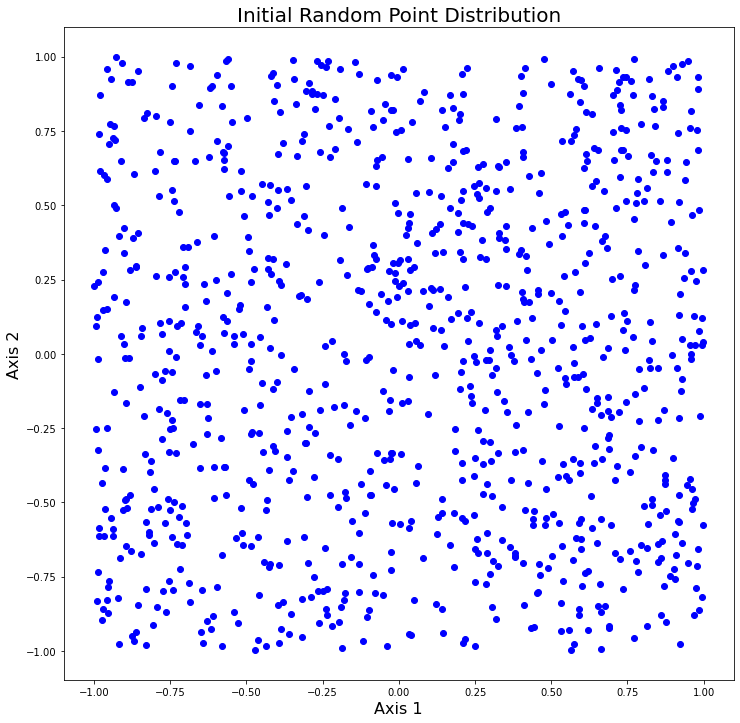

In [109]:
coords = np.random.uniform(-1.0, 1.0, size = (985, 2))
fig=plt.figure(figsize = (12,12))
ax = fig.add_subplot()
ax.set_title('Initial Random Point Distribution', fontsize = 20)
ax.set_xlabel('Axis 1', fontsize=16)
ax.set_ylabel('Axis 2', fontsize=16)
ax = plt.scatter(coords[:,0], coords[:,1], color = 'blue')

[2.57178462e+01 1.46801278e+01 8.97133145e+00 7.96548005e+00
 6.97973919e+00 6.41075784e+00 5.73621906e+00 5.25090102e+00
 4.80383807e+00 4.35671077e+00 4.24980073e+00 4.11165056e+00
 3.87449417e+00 3.58972642e+00 3.37948895e+00 3.24920680e+00
 3.17318065e+00 2.97141001e+00 2.78195666e+00 2.71616836e+00
 2.64776134e+00 2.58773577e+00 2.51075494e+00 2.39774343e+00
 2.37046264e+00 2.33382297e+00 2.25257703e+00 2.21542716e+00
 2.14380932e+00 2.10997816e+00 2.09002240e+00 2.03608800e+00
 2.00529815e+00 1.98163777e+00 1.90700733e+00 1.90444909e+00
 1.86087185e+00 1.82642407e+00 1.81328153e+00 1.77747271e+00
 1.74383515e+00 1.71915190e+00 1.69851531e+00 1.65797460e+00
 1.63111283e+00 1.61079955e+00 1.58701690e+00 1.56218362e+00
 1.52340814e+00 1.51614543e+00 1.48286001e+00 1.46459540e+00
 1.44837956e+00 1.43805039e+00 1.41443138e+00 1.41253775e+00
 1.37895158e+00 1.36398591e+00 1.34427618e+00 1.32992879e+00
 1.30775708e+00 1.28869712e+00 1.27363370e+00 1.26163622e+00
 1.24925747e+00 1.242031

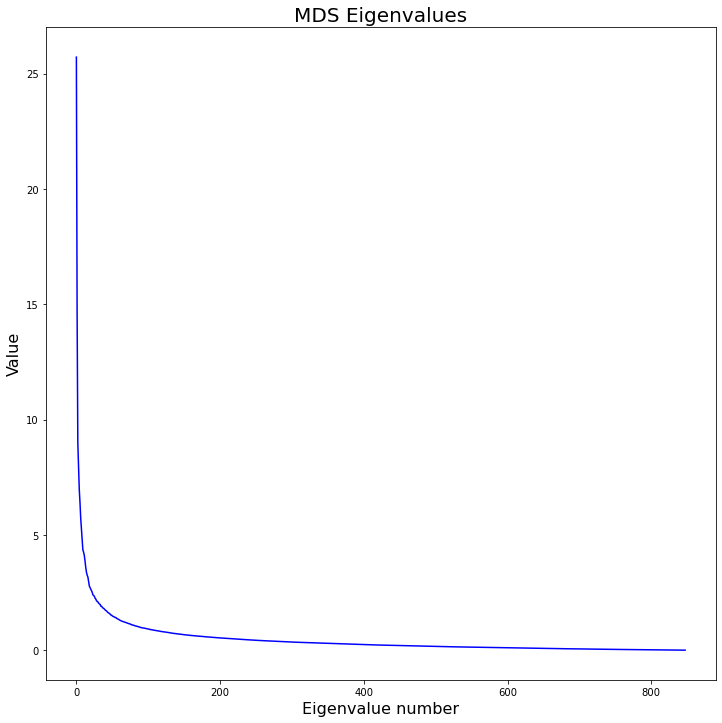

In [110]:
a = -0.5 * (1-tanimoto_matrix) ** 2
# doubly center data
H = np.eye(a.shape[0])-(1/(a.shape[0]))*np.ones(a.shape)
B = H @ a @ H
eigval, eigvec, = np.linalg.eig(B)
V_til = eigvec @ np.sqrt(np.diag(eigval))
# Now find the number of positive eigen values, and just to get the positive columns.
d = np.real(sorted([i for i in eigval if i > 0], reverse = True))
print(d)
print(len(d))
fig=plt.figure(figsize = (12, 12))
ax = fig.add_subplot()
ax.set_title('MDS Eigenvalues', fontsize=20)
ax.set_xlabel('Eigenvalue number', fontsize=16)
ax.set_ylabel('Value', fontsize=16)
ax = plt.plot(range(len(d)), d, color = 'blue')
plt.savefig('./SMILESMDSEigVal.png', bbox_inches='tight')
plt.savefig('./SMILESMDSEigVal.pdf', bbox_inches='tight')

In [111]:
tot_eig = d.sum()
tot_eig

427.6508895136772

In [112]:
running = 0
for ind_, val in enumerate(d):
    running += val
    if(running/tot_eig > 0.95):
        print(f'Number of dimensions needed to reduce strain 5%: {ind_}')
        break

Number of dimensions needed to reduce strain 5%: 517


In [113]:
d

array([2.57178462e+01, 1.46801278e+01, 8.97133145e+00, 7.96548005e+00,
       6.97973919e+00, 6.41075784e+00, 5.73621906e+00, 5.25090102e+00,
       4.80383807e+00, 4.35671077e+00, 4.24980073e+00, 4.11165056e+00,
       3.87449417e+00, 3.58972642e+00, 3.37948895e+00, 3.24920680e+00,
       3.17318065e+00, 2.97141001e+00, 2.78195666e+00, 2.71616836e+00,
       2.64776134e+00, 2.58773577e+00, 2.51075494e+00, 2.39774343e+00,
       2.37046264e+00, 2.33382297e+00, 2.25257703e+00, 2.21542716e+00,
       2.14380932e+00, 2.10997816e+00, 2.09002240e+00, 2.03608800e+00,
       2.00529815e+00, 1.98163777e+00, 1.90700733e+00, 1.90444909e+00,
       1.86087185e+00, 1.82642407e+00, 1.81328153e+00, 1.77747271e+00,
       1.74383515e+00, 1.71915190e+00, 1.69851531e+00, 1.65797460e+00,
       1.63111283e+00, 1.61079955e+00, 1.58701690e+00, 1.56218362e+00,
       1.52340814e+00, 1.51614543e+00, 1.48286001e+00, 1.46459540e+00,
       1.44837956e+00, 1.43805039e+00, 1.41443138e+00, 1.41253775e+00,
      

In [114]:
opt_eig = 0
indices=[]
for ind, val in enumerate(d):
    if val >= 2.5:
        indices.append(ind)
        opt_eig += 1
        
# The enumerate command calls on the index from the array, we are specifcally calling on the values from d
# Always use the empty brackets to create a list at the begining of the code, other wide you will be looping
# and appending over a value, which the program will dislike.
# Play around with the function parts of the for loop to see which will give the best results, for example, changing
# the < or > sign around. 

In [115]:
opt_eig

23

In [116]:
indices

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22]

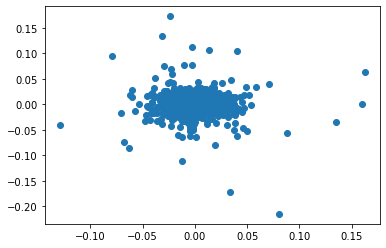

In [117]:
x_axis = np.real(V_til[0])
y_axis = np.real(V_til[1])
plt.scatter(x_axis, y_axis)

In [119]:
from rdkit.Chem import FunctionalGroups
fgs = FunctionalGroups.BuildFuncGroupHierarchy()

from collections import namedtuple
nt = namedtuple('pattern', 'smarts mol')
def flattenFgs(fgs,res):
    if not fgs:
        return
    for x in fgs:
        res[x.label]=nt(x.smarts,x.pattern)
        flattenFgs(x.children,res)

allFgDefs={}
flattenFgs(fgs,allFgDefs)
allFgNames=sorted(allFgDefs.keys())

In [129]:
ring_smiles = pd.read_csv('./RingSmiles.csv')
ring_smiles['FuncGrp'] = np.nan
ring_smiles

,Unnamed: 0,0,FuncGrp
0,0,Cc1ccc2c(c1)cc(C(=O)N1CC[C@H](C(=O)N3CCCCC3)C1...,NaN
1,1,O[C@@H]1C=C[C@H](O)[C@H](O)[C@@H]1O,NaN
2,2,C1CC1N[C@@H]1CCCSC1,NaN
3,3,CC1(C)CC[C@H](C#N)N1O,NaN
4,4,O=C1CCC[C@H](O)N1,NaN
...,...,...,...
995,995,Cc1csc(CO)c1,NaN
996,996,Nc1nccn[n+]1[O-],NaN
997,997,C[C@H]1SC(=N)NC1=O,NaN
998,998,CCn1cccc1C#N,NaN


In [130]:
mols = [Chem.MolFromSmiles(smi) for smi in ring_smiles['0']]

allFgs={}
for fgn in allFgNames:
    patt = allFgDefs[fgn]
    allFgs[fgn]=[m for m in mols if m.HasSubstructMatch(patt.mol)]

In [131]:
allFgs

{'AcidChloride': [],
 'AcidChloride.Aliphatic': [],
 'AcidChloride.Aromatic': [],
 'Alcohol': [<rdkit.Chem.rdchem.Mol at 0x29a035240>,
 'Alcohol.Aliphatic': [<rdkit.Chem.rdchem.Mol at 0x29a035240>,
 'Alcohol.Aromatic': [<rdkit.Chem.rdchem.Mol at 0x15605a920>,
 'Aldehyde': [<rdkit.Chem.rdchem.Mol at 0x15605a020>,
 'Aldehyde.Aliphatic': [<rdkit.Chem.rdchem.Mol at 0x155f83d60>,
 'Aldehyde.Aromatic': [<rdkit.Chem.rdchem.Mol at 0x15605a020>,
 'Amine': [<rdkit.Chem.rdchem.Mol at 0x15605a0e0>,
 'Amine.Aliphatic': [<rdkit.Chem.rdchem.Mol at 0x15605a0e0>,
 'Amine.Aromatic': [<rdkit.Chem.rdchem.Mol at 0x15605a020>,
 'Amine.Cyclic': [<rdkit.Chem.rdchem.Mol at 0x15605a260>,
 'Amine.Primary': [<rdkit.Chem.rdchem.Mol at 0x156059ba0>,
 'Amine.Primary.Aliphatic': [<rdkit.Chem.rdchem.Mol at 0x156059ba0>,
 'Amine.Primary.Aromatic': [<rdkit.Chem.rdchem.Mol at 0x15605a020>,
 'Amine.Secondary': [<rdkit.Chem.rdchem.Mol at 0x15605a0e0>,
 'Amine.Secondary.Aliphatic': [<rdkit.Chem.rdchem.Mol at 0x15605a0e0>,
 

In [132]:
fg_binned = {}
for fgn in allFgNames:
    patt = allFgDefs[fgn]
    fg_binned[fgn]=[ind for ind, m in enumerate(mols) if m.HasSubstructMatch(patt.mol)]
    print('%s: Found %d '%(fgn,len(fg_binned[fgn])))

AcidChloride: Found 0 
AcidChloride.Aliphatic: Found 0 
AcidChloride.Aromatic: Found 0 
Alcohol: Found 155 
Alcohol.Aliphatic: Found 136 
Alcohol.Aromatic: Found 23 
Aldehyde: Found 36 
Aldehyde.Aliphatic: Found 15 
Aldehyde.Aromatic: Found 22 
Amine: Found 346 
Amine.Aliphatic: Found 276 
Amine.Aromatic: Found 73 
Amine.Cyclic: Found 127 
Amine.Primary: Found 154 
Amine.Primary.Aliphatic: Found 105 
Amine.Primary.Aromatic: Found 51 
Amine.Secondary: Found 109 
Amine.Secondary.Aliphatic: Found 93 
Amine.Secondary.Aromatic: Found 16 
Amine.Tertiary: Found 69 
Amine.Tertiary.Aliphatic: Found 64 
Amine.Tertiary.Aromatic: Found 6 
Azide: Found 1 
Azide.Aliphatic: Found 1 
Azide.Aromatic: Found 0 
BoronicAcid: Found 0 
BoronicAcid.Aliphatic: Found 0 
BoronicAcid.Aromatic: Found 0 
CarboxylicAcid: Found 40 
CarboxylicAcid.Aliphatic: Found 30 
CarboxylicAcid.AlphaAmino: Found 1 
CarboxylicAcid.Aromatic: Found 10 
Halogen: Found 167 
Halogen.Aliphatic: Found 63 
Halogen.Aromatic: Found 109 
Ha

In [133]:
fg_binned['Aldehyde.Aliphatic']

[199, 214, 215, 272, 282, 302, 397, 623, 630, 789, 831, 902, 911, 965, 976]

In [138]:
# Coarse grain bin the solute database
for smi in ring_smiles['0']:
    mol_ = Chem.MolFromSmiles(smi)
    for fgn in allFgNames:
        patt = allFgDefs[fgn]
        batch = fgn.split('.')[0]
        if  mol_.HasSubstructMatch(patt.mol):
            ring_smiles.loc[ring_smiles['0'] == smi, 'FuncGrp'] = batch

In [139]:
ring_smiles

,Unnamed: 0,0,FuncGrp
0,0,Cc1ccc2c(c1)cc(C(=O)N1CC[C@H](C(=O)N3CCCCC3)C1...,NaN
1,1,O[C@@H]1C=C[C@H](O)[C@H](O)[C@@H]1O,Alcohol
2,2,C1CC1N[C@@H]1CCCSC1,Amine
3,3,CC1(C)CC[C@H](C#N)N1O,NaN
4,4,O=C1CCC[C@H](O)N1,Alcohol
...,...,...,...
995,995,Cc1csc(CO)c1,Alcohol
996,996,Nc1nccn[n+]1[O-],Amine
997,997,C[C@H]1SC(=N)NC1=O,NaN
998,998,CCn1cccc1C#N,NaN


In [140]:
fg_hist = {}
for key in fg_binned.keys():
    fg_hist[key] = len(fg_binned[key])
fg_hist

{'AcidChloride': 0,
 'AcidChloride.Aliphatic': 0,
 'AcidChloride.Aromatic': 0,
 'Alcohol': 155,
 'Alcohol.Aliphatic': 136,
 'Alcohol.Aromatic': 23,
 'Aldehyde': 36,
 'Aldehyde.Aliphatic': 15,
 'Aldehyde.Aromatic': 22,
 'Amine': 346,
 'Amine.Aliphatic': 276,
 'Amine.Aromatic': 73,
 'Amine.Cyclic': 127,
 'Amine.Primary': 154,
 'Amine.Primary.Aliphatic': 105,
 'Amine.Primary.Aromatic': 51,
 'Amine.Secondary': 109,
 'Amine.Secondary.Aliphatic': 93,
 'Amine.Secondary.Aromatic': 16,
 'Amine.Tertiary': 69,
 'Amine.Tertiary.Aliphatic': 64,
 'Amine.Tertiary.Aromatic': 6,
 'Azide': 1,
 'Azide.Aliphatic': 1,
 'Azide.Aromatic': 0,
 'BoronicAcid': 0,
 'BoronicAcid.Aliphatic': 0,
 'BoronicAcid.Aromatic': 0,
 'CarboxylicAcid': 40,
 'CarboxylicAcid.Aliphatic': 30,
 'CarboxylicAcid.AlphaAmino': 1,
 'CarboxylicAcid.Aromatic': 10,
 'Halogen': 167,
 'Halogen.Aliphatic': 63,
 'Halogen.Aromatic': 109,
 'Halogen.Bromine': 25,
 'Halogen.Bromine.Aliphatic': 3,
 'Halogen.Bromine.Aromatic': 22,
 'Halogen.Bromine

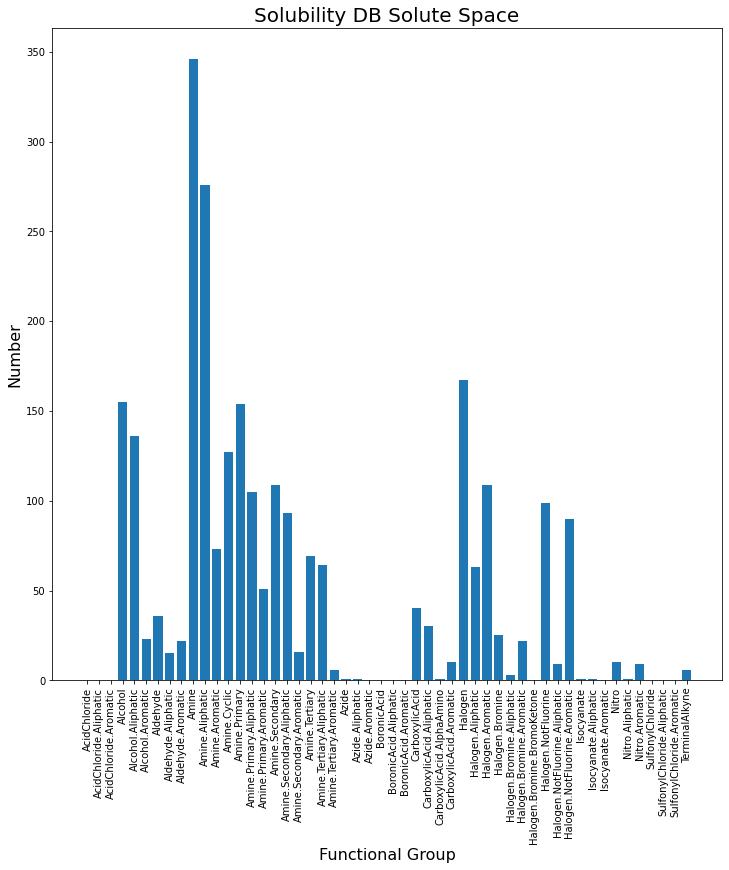

In [141]:
fig=plt.figure(figsize = (12, 12))
ax = fig.add_subplot()
ax.set_title('Solubility DB Solute Space', fontsize=20)
ax.set_xlabel('Functional Group', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax = plt.bar(fg_hist.keys(), fg_hist.values())
plt.xticks(rotation=90)
plt.savefig('./SmileFuncGrps.png', bbox_inches='tight')
plt.savefig('./SmileFuncGrps.pdf', bbox_inches='tight')